In [1]:
import numpy as np
import pandas as pd
r=pd.read_csv('car data.csv')
r.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
r.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [5]:
X=r.drop('Selling_Price',axis=1)
y=r['Selling_Price']

In [6]:
print(X)

    Car_Name  Year  Present_Price  Driven_kms Fuel_Type Selling_type  \
0       ritz  2014           5.59       27000    Petrol       Dealer   
1        sx4  2013           9.54       43000    Diesel       Dealer   
2       ciaz  2017           9.85        6900    Petrol       Dealer   
3    wagon r  2011           4.15        5200    Petrol       Dealer   
4      swift  2014           6.87       42450    Diesel       Dealer   
..       ...   ...            ...         ...       ...          ...   
296     city  2016          11.60       33988    Diesel       Dealer   
297     brio  2015           5.90       60000    Petrol       Dealer   
298     city  2009          11.00       87934    Petrol       Dealer   
299     city  2017          12.50        9000    Diesel       Dealer   
300     brio  2016           5.90        5464    Petrol       Dealer   

    Transmission  Owner  
0         Manual      0  
1         Manual      0  
2         Manual      0  
3         Manual      0  
4    

In [7]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [8]:
pd.DataFrame(X,columns=r.columns[:-1])

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,ritz,2014,NaN,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,NaN,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,NaN,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,NaN,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,NaN,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...,...
296,city,2016,NaN,11.60,33988,Diesel,Dealer,Manual
297,brio,2015,NaN,5.90,60000,Petrol,Dealer,Manual
298,city,2009,NaN,11.00,87934,Petrol,Dealer,Manual
299,city,2017,NaN,12.50,9000,Diesel,Dealer,Manual


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [11]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
X,y=make_classification(n_samples=1000,n_features=10,n_informative=6,n_redundant=4,n_classes=3,random_state=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
model=LogisticRegression(multi_class='ovr')
model.fit(X_train,y_train)
yhat=model.predict(X_test)
yhat
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))
print(accuracy_score(y_test,yhat))

[[54  7  1]
 [ 3 53  8]
 [13  7 54]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        62
           1       0.79      0.83      0.81        64
           2       0.86      0.73      0.79        74

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.80       200

0.805


In [12]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
X,y=make_classification(n_samples=1000,n_features=10,n_informative=6,n_redundant=4,n_classes=5,random_state=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
model=LogisticRegression(multi_class='ovr')
model.fit(X_train,y_train)
yhat=model.predict(X_test)
yhat
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))
print(accuracy_score(y_test,yhat))

[[30  5  4  0  3]
 [ 2 13  7  5  1]
 [ 4  7 26  3  3]
 [ 7  3  5 24  4]
 [12  3  7  9 13]]
              precision    recall  f1-score   support

           0       0.55      0.71      0.62        42
           1       0.42      0.46      0.44        28
           2       0.53      0.60      0.57        43
           3       0.59      0.56      0.57        43
           4       0.54      0.30      0.38        44

    accuracy                           0.53       200
   macro avg       0.52      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200

0.53


In [13]:
from sklearn import svm
clf=svm.SVC(kernel='linear',C=0.01)
clf.fit(X_train,y_train)
y_pred_svm=clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))

[[33  2  4  0  3]
 [ 4 14  5  5  0]
 [ 4  4 28  2  5]
 [ 7  4  4 24  4]
 [ 8  3  8  4 21]]
              precision    recall  f1-score   support

           0       0.59      0.79      0.67        42
           1       0.52      0.50      0.51        28
           2       0.57      0.65      0.61        43
           3       0.69      0.56      0.62        43
           4       0.64      0.48      0.55        44

    accuracy                           0.60       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.61      0.60      0.60       200

0.6


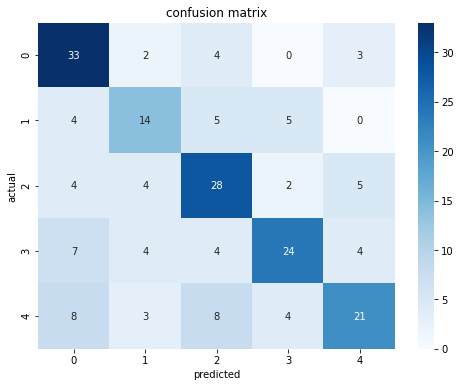

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=[0,1,2,3,4], yticklabels=[0, 1, 2,3,4])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()